In [ ]:
!pip -q install mat73
!pip -q install geopandas
!pip -q install geojson

     |████████████████████████████████| 1.0 MB 4.6 MB/s 
     |████████████████████████████████| 16.7 MB 332 kB/s 
     |████████████████████████████████| 6.3 MB 30.8 MB/s 


In [ ]:
import os
import mat73
import geojson

import numpy as np
import pandas as pd
from tensorflow import keras
from tensorflow.keras import layers

from matplotlib import pyplot as plt
from matplotlib.patches import Patch
from matplotlib.lines import Line2D

In [ ]:
base_path = '/content/drive/MyDrive/SeonwooKim GSoC 2022/4_DataBases/extract/'

In [ ]:
ds1_path, ds2_path, ds3_path, ds4_path, ds5_path, ds6_path, ds7_path, ds8_path, cd_path, cs_path = [os.path.join(base_path, ds_path) for ds_path in os.listdir(base_path)]

In [ ]:
cs_cn0={}
idx = 0
for i in range(8):
  prn = mat73.loadmat(os.path.join(ds1_path, f'tracking_ch_{i}.mat'))['PRN'][-1]
  if prn == 23: continue
  cs_cn0[prn] = mat73.loadmat(os.path.join(cs_path, f'tracking_ch_{i}.mat'))['CN0_SNV_dB_Hz'][1000:]
  idx += 1

ds1_cn0={}
idx = 0
for i in range(8):
  prn =  mat73.loadmat(os.path.join(ds1_path, f'tracking_ch_{i}.mat'))['PRN'][-1]
  # if prn not in prn_dict['inorder']: continue
  ds1_cn0[prn] = mat73.loadmat(os.path.join(ds1_path, f'tracking_ch_{i}.mat'))['CN0_SNV_dB_Hz'][1000:]
  idx += 1

ds2_cn0={}
idx = 0
for i in range(8):
  prn = mat73.loadmat(os.path.join(ds2_path, f'tracking_ch_{i}.mat'))['PRN'][-1]
  # if prn not in prn_dict['inorder']: continue
  ds2_cn0[prn] = mat73.loadmat(os.path.join(ds2_path, f'tracking_ch_{i}.mat'))['CN0_SNV_dB_Hz'][1000:]
  idx += 1

ds3_cn0={}
idx = 0
for i in range(8):
  prn = mat73.loadmat(os.path.join(ds3_path, f'tracking_ch_{i}.mat'))['PRN'][-1]
  # if prn not in prn_dict['inorder']: continue
  ds3_cn0[prn] = mat73.loadmat(os.path.join(ds3_path, f'tracking_ch_{i}.mat'))['CN0_SNV_dB_Hz'][1000:]
  idx += 1

ds4_cn0={}
idx = 0
for i in range(8):
  prn = mat73.loadmat(os.path.join(ds4_path, f'tracking_ch_{i}.mat'))['PRN'][-1]
  # if prn not in prn_dict['inorder']: continue
  ds4_cn0[prn] = mat73.loadmat(os.path.join(ds4_path, f'tracking_ch_{i}.mat'))['CN0_SNV_dB_Hz'][1000:]
  idx += 1

ds7_cn0={}
idx = 0
for i in range(8):
  prn = mat73.loadmat(os.path.join(ds7_path, f'tracking_ch_{i}.mat'))['PRN'][-1]
  # if prn not in prn_dict['inorder']: continue
  ds7_cn0[prn] = mat73.loadmat(os.path.join(ds7_path, f'tracking_ch_{i}.mat'))['CN0_SNV_dB_Hz'][1000:]
  idx += 1

ds8_cn0={}
idx = 0
for i in range(8):
  prn = mat73.loadmat(os.path.join(ds8_path, f'tracking_ch_{i}.mat'))['PRN'][-1]
  # if prn not in prn_dict['inorder']: continue
  ds8_cn0[prn] = mat73.loadmat(os.path.join(ds8_path, f'tracking_ch_{i}.mat'))['CN0_SNV_dB_Hz'][1000:]
  idx += 1

In [ ]:
np.concatenate([np.array([1]*5), np.array([2,3,4])])[1:4]

array([1, 1, 1])

In [ ]:
data_main = cs_cn0[3]
data_ma20 = [data_main[i-20:i].mean() for i in range(20, len(data_main))]

In [ ]:
def plot_cn0(data, prn, start, bandsize):
  plt.figure(figsize=(12,8))

  data_main = data[prn]

  data_ma = np.array([data_main[i-bandsize:i].mean() for i in range(bandsize, len(data_main))])
  data_ma = np.concatenate([[data_ma[0]]*bandsize, data_ma])

  data_std = np.array([data_main[i-bandsize:i].std() for i in range(bandsize, len(data_main))])
  data_std = np.concatenate([[data_std[0]]*bandsize, data_std])

  data_bb_up = data_ma + data_std*3
  data_bb_low = data_ma - data_std*3

  plt.plot(data_main[start:start+1000], color='dodgerblue')
  plt.plot(data_ma[start:start+1000], color='green', linestyle='--')
  plt.plot(data_bb_up[start:start+1000], color='orange', linestyle='--')
  plt.plot(data_bb_low[start:start+1000], color='red', linestyle='--')

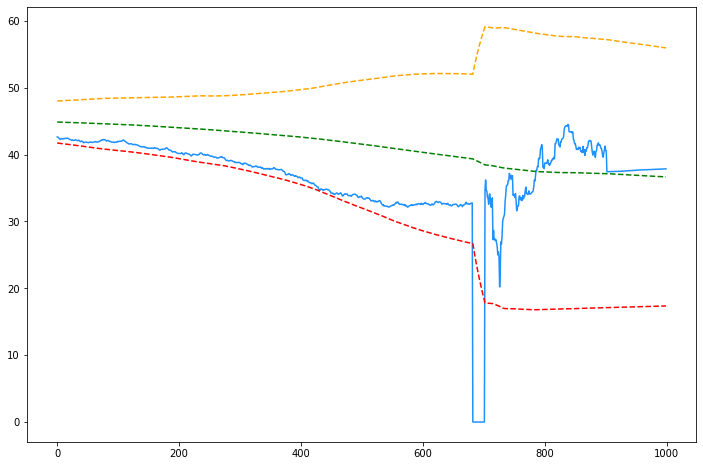

In [ ]:
plot_cn0(ds3_cn0, 13, 19000, 1000)

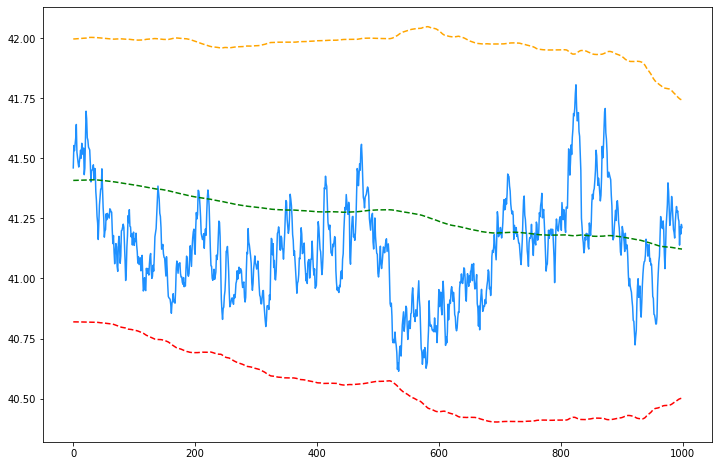

In [ ]:
plot_cn0(ds3_cn0, 13, 12000, 1000)